# Exercise 1
```In this exercise you will experience with pandas, matplotlib and numpy. This are main tools we are going to use later in course, and which are extremly useful in a variety of tasks. For each question, answer it in cells directly beneath it.```

```You are more than encourged to read relevant parts, mainly from ``` [pandas' API](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

```~ Ittai Haran```

## DataFrame basics

```A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames```

```import numpy and pandas```

In [0]:
import pandas as pd
import numpy as np

```Consider the following Python dictionary `data` and Python list `labels`:```

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

```Create a DataFrame `df` from this dictionary `data` which has the index `labels`.```

In [2]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data, labels)
df

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2
d,NaN,dog,yes,3
e,5.0,dog,no,2
f,2.0,cat,no,3
g,4.5,snake,no,1
h,NaN,cat,yes,1
i,7.0,dog,no,2
j,3.0,dog,no,1


```Display a summary of the basic information about this DataFrame and its data using the decribe and the info functions```

In [3]:
print(df.info())
print(df.info)

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
age         8 non-null float64
animal      10 non-null object
priority    10 non-null object
visits      10 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes
None
<bound method DataFrame.info of    age animal priority  visits
a  2.5    cat      yes       1
b  3.0    cat      yes       3
c  0.5  snake       no       2
d  NaN    dog      yes       3
e  5.0    dog       no       2
f  2.0    cat       no       3
g  4.5  snake       no       1
h  NaN    cat      yes       1
i  7.0    dog       no       2
j  3.0    dog       no       1>


```Return the first 3 rows of the DataFrame `df`. Do it two times: use head and iloc```

In [4]:
print(df.head(3))
print(df.iloc[0:2])
print(df.loc['a'])

   age animal priority  visits
a  2.5    cat      yes       1
b  3.0    cat      yes       3
c  0.5  snake       no       2
   age animal priority  visits
a  2.5    cat      yes       1
b  3.0    cat      yes       3
age         2.5
animal      cat
priority    yes
visits        1
Name: a, dtype: object


```Select just the 'animal' and 'age' columns from the DataFrame `df`.```

In [5]:
print(df['animal'])
print(df['age'])

a      cat
b      cat
c    snake
d      dog
e      dog
f      cat
g    snake
h      cat
i      dog
j      dog
Name: animal, dtype: object
a    2.5
b    3.0
c    0.5
d    NaN
e    5.0
f    2.0
g    4.5
h    NaN
i    7.0
j    3.0
Name: age, dtype: float64


```Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.```

In [6]:
df.loc[['c','d','h'],['animal','age']]

,animal,age
c,snake,0.5
d,dog,NaN
h,cat,NaN


```Select only the rows where the number of visits is greater than 3. Pandas supports two useful APIs:
(df[boolean list/series]) returns the rows for which the value is True
(df[column] > num) returns a boolean series```

In [7]:
print(df[df['visits']>=3])
print("")
print(df['visits']>=3)

   age animal priority  visits
b  3.0    cat      yes       3
d  NaN    dog      yes       3
f  2.0    cat       no       3

a    False
b     True
c    False
d     True
e    False
f     True
g    False
h    False
i    False
j    False
Name: visits, dtype: bool


```Select the rows where the age is missing, i.e. is `NaN`.```

In [8]:
df[df['age'].notnull()]

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2
e,5.0,dog,no,2
f,2.0,cat,no,3
g,4.5,snake,no,1
i,7.0,dog,no,2
j,3.0,dog,no,1


```Select the rows where the animal is a cat *and* the age is less than 3. You can use logical operands: &, |, ~```

In [9]:
df[(df['animal']== 'cat') & (df['age']<3)]

,age,animal,priority,visits
a,2.5,cat,yes,1
f,2.0,cat,no,3


```Select the rows the age is between 2 and 4 (inclusive).```

In [10]:
df[(df['age']>=2) & (df['age']<=4)]

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
f,2.0,cat,no,3
j,3.0,dog,no,1


```Change the age in row 'f' to 1.5.```

In [11]:
df.set_value('f','age', 1.5)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2
d,NaN,dog,yes,3
e,5.0,dog,no,2
f,1.5,cat,no,3
g,4.5,snake,no,1
h,NaN,cat,yes,1
i,7.0,dog,no,2
j,3.0,dog,no,1


```Calculate the sum of all visits (the total number of visits). Do it twice: using built in pandas functions and using numpy```

In [12]:
print(df.sum(0)['visits'])
print(np.sum(df['visits']))

19
19


```Calculate the mean age for each different animal in `df`.```

In [13]:
animals = []
for i in set(df['animal']):
    animals.append(i)
for animal in animals:
    print(animal + " " + str(df[df['animal'] == animal].mean(0)['age']))

dog 5.0
snake 2.5
cat 2.3333333333333335


```Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.```

In [14]:
df.loc['k'] = [19, 'Human', 'yes', 1]
print(df)
df = df.drop(['k'])
print(df)



    age animal priority  visits
a   2.5    cat      yes       1
b   3.0    cat      yes       3
c   0.5  snake       no       2
d   NaN    dog      yes       3
e   5.0    dog       no       2
f   1.5    cat       no       3
g   4.5  snake       no       1
h   NaN    cat      yes       1
i   7.0    dog       no       2
j   3.0    dog       no       1
k  19.0  Human      yes       1
   age animal priority  visits
a  2.5    cat      yes       1
b  3.0    cat      yes       3
c  0.5  snake       no       2
d  NaN    dog      yes       3
e  5.0    dog       no       2
f  1.5    cat       no       3
g  4.5  snake       no       1
h  NaN    cat      yes       1
i  7.0    dog       no       2
j  3.0    dog       no       1


```Count the number of each type of animal in `df`.```

In [15]:
animals = []
for i in set(df['animal']):
    animals.append(i)
sum = 0
for animal in animals:
    for i in df['animal']:
        if i == animal:
            sum += 1
    print(animal + " " + str(sum))
    sum=0

dog 4
snake 2
cat 4


```Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visit' column in *ascending* order. You can use the sort_values function```

In [16]:
df = df.sort_values('age', ascending = False)
print(df)
df = df.sort_values('visits')
print(df)
#return to normal:
df = df.sort_index()
df

   age animal priority  visits
i  7.0    dog       no       2
e  5.0    dog       no       2
g  4.5  snake       no       1
b  3.0    cat      yes       3
j  3.0    dog       no       1
a  2.5    cat      yes       1
f  1.5    cat       no       3
c  0.5  snake       no       2
d  NaN    dog      yes       3
h  NaN    cat      yes       1
   age animal priority  visits
g  4.5  snake       no       1
j  3.0    dog       no       1
a  2.5    cat      yes       1
h  NaN    cat      yes       1
i  7.0    dog       no       2
e  5.0    dog       no       2
c  0.5  snake       no       2
b  3.0    cat      yes       3
f  1.5    cat       no       3
d  NaN    dog      yes       3


,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2
d,NaN,dog,yes,3
e,5.0,dog,no,2
f,1.5,cat,no,3
g,4.5,snake,no,1
h,NaN,cat,yes,1
i,7.0,dog,no,2
j,3.0,dog,no,1


```The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.```

In [17]:
for idx, sris in df.iterrows():
    if sris['priority'] == 'yes':
        df.set_value(idx,'priority', True)
    elif sris['priority'] == 'no':
        df.set_value(idx,'priority', False)
df

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


,age,animal,priority,visits
a,2.5,cat,True,1
b,3.0,cat,True,3
c,0.5,snake,False,2
d,NaN,dog,True,3
e,5.0,dog,False,2
f,1.5,cat,False,3
g,4.5,snake,False,1
h,NaN,cat,True,1
i,7.0,dog,False,2
j,3.0,dog,False,1


```In the 'animal' column, change the 'snake' entries to 'python'.```

In [18]:
for idx, sris in df.iterrows():
    if sris['animal'] == 'snake':
        df.set_value(idx,'animal', 'python')
df

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


,age,animal,priority,visits
a,2.5,cat,True,1
b,3.0,cat,True,3
c,0.5,python,False,2
d,NaN,dog,True,3
e,5.0,dog,False,2
f,1.5,cat,False,3
g,4.5,python,False,1
h,NaN,cat,True,1
i,7.0,dog,False,2
j,3.0,dog,False,1


```For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (hint: use a pivot table).```

In [19]:
df.groupby(['animal', 'visits'])['age'].aggregate('mean').unstack()
df.groupby(['animal', 'visits'])[['age']].mean()

age
animal visits      
cat    1       2.50
       3       2.25
dog    1       3.00
       2       6.00
       3        NaN
python 1       4.50
       2       0.50

In [0]:
# animals = []
# for i in set(df['animal']):
#     animals.append(i)
# visits = []
# for i in set(df['visits']):
#     visits.append(i)
# visits.sort()

# animal_visits = []
# for animal in animals:
#     for visit in visits:
#         animal_visits.append((animal, visit))

# df_new = Dataframe(index = animals, data = )


# for idx, animal_visit in enumarate(animal_visits):
#     mean_age = df[(df['animal'] == animal_visit[0]) & (df['visits'] == animal_visit[1])].mean(0)['age']
#     animal_visits[idx] = (animal_visit, mean_age)

# df_new = Dataframe()
    
    

# for idx, sris in df.iterrows():
# df.pivot(index = 'animal', columns = 'visits', values = 'age')

```Now you will be asked to generate your own test data and manipulate it using functions you will have to create.```

```Create a dataframe with 1000 rows and 3 columns. The columns are to be the following:```
```
        - age: an integer, uniformly distributed between 20 to 65
        - skill: a float, normally distributed between 0 and 1, with expected value = 0.5 and standard deviation = 0.3
        - height: a float with 2 digits after the decimal point, between 1.5 to 2.0
```
```you might want to use numpy.random```

In [21]:
ages = np.random.randint(20, 66, 1000)
skills = np.random.normal(0.5, 0.3, 1000)
for idx,skill in enumerate(skills):
    while skill<0 or skill>1:
        skill = np.random.normal(0.5, 0.3)
    skills[idx] = skill
heights = []
for i in range(1000):
    new_num = round(np.random.uniform(1.5, 2.0),2)
    heights.append(new_num)
heights = np.array(heights)
dtfrm = pd.DataFrame({'age':ages, 'skill':skills, 'height':heights})
dtfrm

,age,height,skill
0,47,1.87,0.217301
1,49,1.55,0.412750
2,25,1.89,0.348233
3,22,1.95,0.318563
4,20,1.86,0.716095
5,30,1.88,0.248145
6,65,1.97,0.435566
7,22,1.93,0.248984
8,23,1.56,0.349002
9,45,1.64,0.802275


```Add the dataframe a new columns, called salary, when:```
        <center>$salary = 1000\cdot((age^2)/1000 + 1.7\cdot skill + 0.4\cdot exp(-(height-1.7)^2)$<center>

In [22]:
salaries = np.array(1000*((ages**2)/1000+1.7*skills+0.4*np.exp(-1*(heights-1.7)**2)))
dtfrm['salary'] = salaries
dtfrm

,age,height,skill,salary
0,47,1.87,0.217301,2758.016489
1,49,1.55,0.412750,3092.774675
2,25,1.89,0.348233,977.813835
3,22,1.95,0.318563,917.321986
4,20,1.86,0.716095,1607.252060
5,30,1.88,0.248145,809.094905
6,65,1.97,0.435566,5112.339330
7,22,1.93,0.248984,802.662141
8,23,1.56,0.349002,985.538935
9,45,1.64,0.802275,3762.429645


```Split the dataframe to groups by the age left digit and by the age. for each group compute:```
```
        - the number of rows
        - the mean salary
        - the maximum height     
```

```To do so, read about the groupby and agg functions is the ``` [pandas API](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

In [0]:
left_digit_ages = dtfrm['age']
left_digit_ages = left_digit_ages//10
dtfrm['left_digit_age'] = left_digit_ages

In [24]:
left_digit_age_groups = dtfrm.groupby('left_digit_age')
age_groups = dtfrm.groupby('age')
print(left_digit_age_groups.size())
print(left_digit_age_groups['salary'].mean())
print(left_digit_age_groups['height'].max())
age_groups = dtfrm.groupby('age')
print(age_groups.size())
print(age_groups['salary'].mean())
print(age_groups['height'].max())



left_digit_age
2    213
3    217
4    207
5    233
6    130
dtype: int64
left_digit_age
2    1238.503733
3    2021.571599
4    2774.318889
5    3815.629456
6    4540.257159
Name: salary, dtype: float64
left_digit_age
2    2.0
3    2.0
4    2.0
5    2.0
6    2.0
Name: height, dtype: float64
age
20    27
21    22
22    26
23    18
24    25
25    18
26    17
27    21
28    13
29    26
30    16
31    22
32    26
33    27
34    18
35    21
36    19
37    25
38    24
39    19
40    21
41    18
42    30
43    18
44    14
45    24
46    21
47    15
48    21
49    25
50    19
51    30
52    17
53    19
54    20
55    26
56    28
57    25
58    26
59    23
60    18
61    26
62    16
63    28
64    20
65    22
dtype: int64
age
20    1190.285235
21    1279.311653
22    1282.410309
23    1194.354382
24    1244.624414
25    1119.363483
26    1272.888952
27    1298.715859
28    1297.764514
29    1216.555906
30    1232.432519
31    1255.292343
32    2195.022463
33    2233.494560
34    2248.212646
35  

```Now split the dataframe to groups by age. For each group compute the mean salary, divided by the sum of heights.```

In [0]:
age_groups = dtfrm.groupby('age')
new_srs = age_groups['salary'].mean()/age_groups['height'].sum()

```Add these lines to your code:```
```python
        import matplotlib.pyplot as plt
        %matplotlib inline
``` 
       
```Now try using the pd.DataFrame.plot function to show your data. Try also using pd.DataFrame.boxplot.```

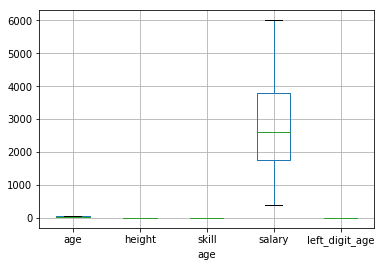

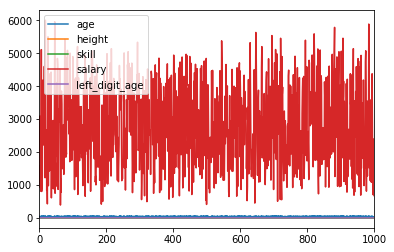

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
new_srs.plot()
dtfrm.boxplot()
plt.show()
dtfrm.plot()

```Save the result as a csv```

## Working with real-life data

```read the csv file entitled house_prices_numeric.csv consider writing the following line of code:```
```python
pd.options.display.max_columns=50
```

In [0]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_numeric.csv')
pd.options.display.max_columns=50
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,1993.0,2,480,40,30,0,320,0,0,700,10,2009,143000
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2004.0,2,636,255,57,0,0,0,0,0,8,2007,307000
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,1973.0,2,484,235,204,228,0,0,0,350,11,2009,200000
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,1931.0,2,468,90,0,205,0,0,0,0,4,2008,129900
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,0,140,991,1077,0,0,1077,1,0,1,0,2,2,5,2,1939.0,1,205,0,4,0,0,0,0,0,1,2008,118000


```In the following questions, print your answer if possible, draw a graph or visualize it in any other means. When drawing a graph, add a title to it. Answer the following questions (try using a single line of code for each):```
```
- What is oldest house in the dataset (YearBuilt)?
- What is the highest price (SalePrice) of houses built in that year?
- What is the mean area (LotArea) of houses?
- What is the 50-percentile of the area (LotArea) of houses?
- What is more common: having a fireplace (Fireplaces) in the house, or not having one?
- What is the mean price (SalePrice) of houses that have swimming pools (PoolArea)?
- How many houses were sold every year (YrSold)? Draw a graph using plt.plot or pandas.plot
- What is the distribution of the overall condition of the houses (OverallCond)? Use plt.hist or pandas.hist
- For every number of fireplaces in a house (Fireplaces), compute the mean price of a house, the mean age of the house (we are in 2019) and the count of distinct FullBath values
- Take only houses with MSSubClass > 60. Split into groups according to whether or not the MSSubClass is a multiple of 20. For each group compute the mean, max, min and standard deviation of OverallQual
```

2010.0
755000.0
10516.828082191782
9480.0
True
288138.5714285714


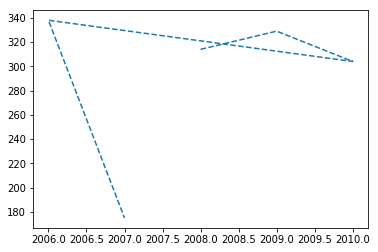

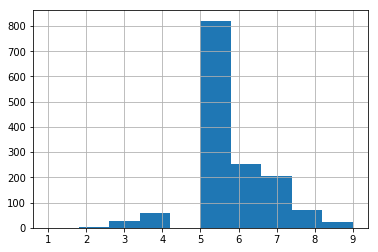

Fireplaces
0    141331.482609
1    211843.909231
2    240588.539130
3    252000.000000
Name: SalePrice, dtype: float64
Fireplaces
0    54.781159
1    39.150769
2    54.347826
3    38.400000
Name: YearBuilt, dtype: float64
Fireplaces
0     964
1    1124
2     188
3       9
Name: FullBath, dtype: int64
multiple_of_20
False    5.556180
True     6.389908
Name: OverallQual, dtype: float64
multiple_of_20
False    10
True      9
Name: OverallQual, dtype: int64
multiple_of_20
False    3
True     4
Name: OverallQual, dtype: int64
multiple_of_20
False    1.193055
True     1.111021
Name: OverallQual, dtype: float64


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [29]:
#1
print(df.sort_values('YearBuilt', ascending = False).iloc[0]['YearBuilt'])
#2
print(df.sort_values('SalePrice', ascending = False).iloc[0]['SalePrice'])
#3
print(df.mean(0)['LotArea'])
#4
print(df.sort_values('LotArea').iloc[730]['LotArea'])
#5
print(df.sort_values('Fireplaces').iloc[730]['Fireplaces']>=1)
#6
has_pool = df['PoolArea']>0
print(df[has_pool]['SalePrice'].mean())
#7
year_sold = df.groupby('YrSold')
plt.plot(year_sold.groups.keys(), year_sold.size(), '--')
plt.show()
#8
df['OverallCond'].hist()
plt.show()
#9
fire_places = df.groupby('Fireplaces')
print(fire_places['SalePrice'].mean())
print(2019-fire_places['YearBuilt'].mean())
print(fire_places['FullBath'].sum())
#10
sub_df = df[df['MSSubClass']>60]
multiple_of_20 = (sub_df['MSSubClass']%20 == 0)
sub_df['multiple_of_20'] = multiple_of_20
groups = sub_df.groupby('multiple_of_20')
qual = groups['OverallQual']
print(qual.mean())
print(qual.max())
print(qual.min())
print(qual.std())

## Feature extraction

```Load the complete version of the houses table, entitled "house_prices_larger.csv"```

In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_larger.csv')
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotConfig
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,Inside
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,FR2
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,Inside
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,Corner
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,FR2
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,1993.0,2,480,40,30,0,320,0,0,700,10,2009,143000,Inside
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2004.0,2,636,255,57,0,0,0,0,0,8,2007,307000,Inside
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,1973.0,2,484,235,204,228,0,0,0,350,11,2009,200000,Corner
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,1931.0,2,468,90,0,205,0,0,0,0,4,2008,129900,Inside
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,0,140,991,1077,0,0,1077,1,0,1,0,2,2,5,2,1939.0,1,205,0,4,0,0,0,0,0,1,2008,118000,Corner


```As you recall, the feature extraction process is done in order to let us describe the data in more "meaningful" manner. Add the following features to your dataframe:```
- ```LotArea in squared meters ( it's currently in units of squared feet)```
- ```1stFlrSF + 2ndFlrSF```
- ```GarageArea**0.5```
- ```LotArea / (BedroomAbvGr+1)```
- ```LotArea / (mean LotArea for houses built in that same year + 1e-5) - you might want to use``` [pandas merge function](https://www.google.com/search?q=pandas+merge&oq=pandas+merge&aqs=chrome..69i57l2j69i59l3j69i60.2080j0j9&sourceid=chrome&ie=UTF-8)
- ```Ranking of LotArea (largest house has 1, the second largest has 2 and so on)```
- ```One hot encoding of LotConfig - that is, add feature againts every value possible in LotConfig, which is 1 if the sample's LotConfig is this value and 0 otherwise (consider``` [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html))

```make a list of the names of the features you created.```

In [0]:
LotAreaMet = df['LotArea']*0.3048
df['LotAreaMet'] = LotAreaMet

TwoFlrSF = df['1stFlrSF'] + df['2ndFlrSF']
df['TwoFlrSF'] = TwoFlrSF

RtGarage = df['GarageArea']**0.5
df['RtGarage'] = RtGarage

Ftr4 = df['LotArea']/(df['BedroomAbvGr']+1)
df['Ftr4'] = Ftr4

meanLotArea = df.groupby('YearBuilt')['LotArea'].mean()+1e-5
MLA = pd.DataFrame({'MeanLotArea': meanLotArea})
MLA = df.merge(MLA, left_on='YearBuilt', right_on='YearBuilt', right_index = True)['MeanLotArea']
Ftr5 = df['LotArea']/MLA
df['Ftr5'] = Ftr5

sorted_by_LA = df.sort_values('LotArea', ascending = False)
new_list = []
temp_df = pd.DataFrame(columns = ['Id', 'Rank'], dtype = 'int64')
for row in range(len(sorted_by_LA)):
    new_list.append([sorted_by_LA.iloc[row]['Id'], row])
    temp_df.loc[str(row)] = [int(sorted_by_LA.iloc[row]['Id']),row+1]
Ftr6 = df.merge(temp_df, left_on='Id', right_on='Id')['Rank']
df['Ftr6'] = Ftr6

groups = df.groupby('LotConfig')
num_of_lot_config = groups.size()
LotConfig_Ftrs = pd.DataFrame(index = list(range(1460)))
i = 1
for group in groups:
    new_ftr = df['LotConfig']== group[0]
    new_ftr = new_ftr*1
    df['Con'+str(i)] = new_ftr
    i += 1



Ftrs_list = ['LotAreaMet', 'TwoFlrSF', 'RtGarage', 'Ftr4', 'Ftr5', 'Ftr6', 'Con1', 'Con2', 'Con3', 'Con4', 'Con5']


# Ftrs_list += LotConfig_Ftrs
# LotAreaMet
# new_dict = {}
# new_dict['Id'] = new_list
# temp_df = pd.DataFrame()

# ['Id']
# sorted_by_LA
# MLAA = MLA['MeanLotArea']
# print((Ftr5*10407.500010)[0:3])
# print(df['LotArea'][0:3])
# print(MLA.loc[[0,1,2],['LotArea', 'YearBuilt','MeanLotArea']])
# print(MLAA.loc[[0,1,2]])
# print(10082.953091*9195.909101)
# print(type(df['LotArea']))
# print(type(MLAA))
# print(len(df['LotArea']))
# print(len(MLAA))


## Simple linear model

```Next, we will train a simple linear model, as seen in class, to predict SalePrice. Use the features you computed. Create train and test segments, normalize the data (both the features and the target) and use a linear model. Make sure you don't somehow use the test data when training your model (or when normalizing your data).```

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

0.005057180602061917

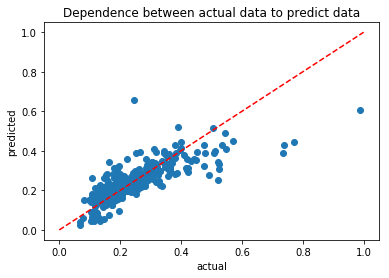

In [33]:
df_ftrs = df[Ftrs_list]
#splitting to train/test groups
train, test = train_test_split(df_ftrs)
sale_price_train = df.loc[train.index,['SalePrice']]
sale_price_test = df.loc[test.index, ['SalePrice']]


#Standardize
max_sale_price = np.max(df['SalePrice'])
sale_price_train = sale_price_train/max_sale_price
sale_price_test = sale_price_test/max_sale_price

#Regression
reg = LinearRegression(normalize =True)
reg.fit(train, sale_price_train)

#Plotting
plt.plot([0,1],[0,1],'r--')
plt.scatter(sale_price_test ,reg.predict(test))
plt.title("Dependence between actual data to predict data")
plt.xlabel("actual")
plt.ylabel("predicted")
mean_squared_error(sale_price_test ,reg.predict(test))


# print(train)
# print(sale_price_train)
# train = StandardScaler.transform(StandardScaler(train['SalePrice']),StandardScaler(train[Ftrs_list]))


```Next, we will add extra features: for any feature you computed earlier, add feature**2 and feature**3. Now use Ridge regression (regularized linear regression, as we discussed in class). Draw graphs of the loss computed on the train and on the validation as a function of the regularization parameter, for``` 1$\leq\alpha\leq$30. ```What regularization would it be best to take?```

In [34]:
from sklearn.linear_model import Ridge
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_larger.csv')

LotAreaMet = df['LotArea']*0.3048
df['LotAreaMet'] = LotAreaMet

TwoFlrSF = df['1stFlrSF'] + df['2ndFlrSF']
df['TwoFlrSF'] = TwoFlrSF

RtGarage = df['GarageArea']**0.5
df['RtGarage'] = RtGarage

Ftr4 = df['LotArea']/(df['BedroomAbvGr']+1)
df['Ftr4'] = Ftr4

meanLotArea = df.groupby('YearBuilt')['LotArea'].mean()+1e-5
MLA = pd.DataFrame({'MeanLotArea': meanLotArea})
MLA = df.merge(MLA, left_on='YearBuilt', right_on='YearBuilt', right_index = True)['MeanLotArea']
Ftr5 = df['LotArea']/MLA
df['Ftr5'] = Ftr5

sorted_by_LA = df.sort_values('LotArea', ascending = False)
new_list = []
temp_df = pd.DataFrame(columns = ['Id', 'Rank'], dtype = 'int64')
for row in range(len(sorted_by_LA)):
    new_list.append([sorted_by_LA.iloc[row]['Id'], row])
    temp_df.loc[str(row)] = [int(sorted_by_LA.iloc[row]['Id']),row+1]
Ftr6 = df.merge(temp_df, left_on='Id', right_on='Id')['Rank']
df['Ftr6'] = Ftr6

groups = df.groupby('LotConfig')
num_of_lot_config = groups.size()
LotConfig_Ftrs = pd.DataFrame(index = list(range(1460)))
i = 1
for group in groups:
    new_ftr = df['LotConfig']== group[0]
    new_ftr = new_ftr*1
    df['Con'+str(i)] = new_ftr
    i += 1



Ftrs_list = ['LotAreaMet', 'TwoFlrSF', 'RtGarage', 'Ftr4', 'Ftr5', 'Ftr6', 'Con1', 'Con2', 'Con3', 'Con4', 'Con5']


df_ftrs = df[Ftrs_list]
target = df["SalePrice"]/np.max(df["SalePrice"])

for a in df_ftrs.columns:
    df_ftrs["{}**2".format(a)]=df_ftrs[a]**2
    df_ftrs["{}**3".format(a)]=df_ftrs[a]**3

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


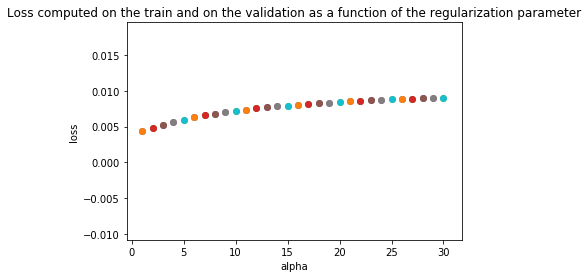

In [35]:
#splitting to train/test groups
train, test = train_test_split(df_ftrs)
sale_price_train = df.loc[train.index,['SalePrice']]
sale_price_test = df.loc[test.index, ['SalePrice']]


#Standardize
max_sale_price = np.max(df['SalePrice'])
sale_price_train = sale_price_train/max_sale_price
sale_price_test = sale_price_test/max_sale_price



for i in range(10,310,5):
    reg = Ridge(alpha=i/10, normalize=True)
    reg.fit(train,sale_price_train)
    
    plt.title("Loss computed on the train and on the validation as a function of the regularization parameter")
    plt.scatter(i/10,mean_squared_error(sale_price_test, reg.predict(test)))
    plt.xlabel("alpha")
    plt.ylabel("loss")